# Assignment 2 Part A

## Importing neccessary libraries

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data as a Pandas DataFrame

In [142]:
raw_data = pd.read_csv('audi.csv')
raw_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


## Checking for null values in the Dataset

In [ ]:
raw_data.isna().sum()

## Removing the categorical features from the Dataset

In [143]:
data = raw_data.drop(columns=raw_data.select_dtypes('object').columns)
data

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0
10664,2020,16999,1978,150,49.6,1.0
10665,2020,17199,609,150,49.6,1.0
10666,2017,19499,8646,150,47.9,1.4


## Centering the Dataset

In [144]:
centered_data = data.copy()

for feature in data.columns: 
    centered_data[feature] = (data[feature] - data[feature].mean())/data[feature].std()
     
centered_data

,year,price,mileage,tax,mpg,engineSize
0,-0.046448,-0.887480,-0.386817,0.357131,0.357533,-0.880177
1,-0.507810,-0.546033,0.483966,-1.578249,1.037081,0.114919
2,-0.507810,-1.015522,0.217771,-1.429373,0.357533,-0.880177
3,-0.046448,-0.520424,0.047851,0.282693,1.276468,0.114919
4,0.876277,-0.477743,-0.971240,0.282693,-0.090351,-1.543575
...,...,...,...,...,...,...
10663,1.337639,-0.503437,-0.885302,0.282693,-0.090351,-1.543575
10664,1.337639,-0.503437,-0.972091,0.357131,-0.090351,-1.543575
10665,1.337639,-0.486365,-1.030333,0.357131,-0.090351,-1.543575
10666,-0.046448,-0.290033,-0.688410,0.357131,-0.221627,-0.880177


## Making the Covariance Matrix

In [145]:
cov_mat = np.cov(centered_data, rowvar=False)
cov_mat.shape

(6, 6)

## Getting the Eigenvalues and Eigenvectors for the Covariance Matrix

In [146]:
eigvals, eigvecs = np.linalg.eig(cov_mat)
eigvecs = eigvecs.T
eigvals

array([3.00600026, 1.55286623, 0.78562111, 0.13386766, 0.20305466,
       0.31859008])

In [147]:
eigvecs

array([[-0.40282543, -0.51016611,  0.4047773 , -0.34511511,  0.46372679,
        -0.28190526],
       [-0.50443824,  0.03785255,  0.49359229,  0.40349442, -0.19415189,
         0.54769809],
       [-0.10088103, -0.41901248, -0.08336572,  0.59569749, -0.372847  ,
        -0.55984939],
       [ 0.37645692, -0.73835396, -0.08457989, -0.1298729 , -0.20625118,
         0.49654138],
       [ 0.63995831,  0.0976721 ,  0.72984732,  0.13908837,  0.02788077,
        -0.16767081],
       [ 0.1477508 , -0.08955372, -0.21387209,  0.57185643,  0.75161875,
         0.18016117]])

## Sorting the Eigenvectors according to descending values of the corresponding Eigenvalues

In [148]:
sorted_indices = np.flip(np.argsort(eigvals))
sorted_eigvals = eigvals[sorted_indices]
sorted_eigvecs = eigvecs[sorted_indices]
sorted_eigvals

array([3.00600026, 1.55286623, 0.78562111, 0.31859008, 0.20305466,
       0.13386766])

In [149]:
sorted_eigvecs
#sorted_eigvecs = sorted_eigvecs*-1

array([[-0.40282543, -0.51016611,  0.4047773 , -0.34511511,  0.46372679,
        -0.28190526],
       [-0.50443824,  0.03785255,  0.49359229,  0.40349442, -0.19415189,
         0.54769809],
       [-0.10088103, -0.41901248, -0.08336572,  0.59569749, -0.372847  ,
        -0.55984939],
       [ 0.1477508 , -0.08955372, -0.21387209,  0.57185643,  0.75161875,
         0.18016117],
       [ 0.63995831,  0.0976721 ,  0.72984732,  0.13908837,  0.02788077,
        -0.16767081],
       [ 0.37645692, -0.73835396, -0.08457989, -0.1298729 , -0.20625118,
         0.49654138]])

## Calculating the Explained Variance and Cummulative Variance

In [150]:
explained_variance = sorted_eigvals*100/sum(sorted_eigvals)
explained_variance.tolist()

[50.100004287997265,
 25.88110390461536,
 13.093685165273351,
 5.309834685553136,
 3.3842443135410276,
 2.2311276430198577]

In [151]:
cummulative_variance = [sum(explained_variance[ : i + 1]) for i in range(len(explained_variance))]
cummulative_variance

[50.100004287997265,
 75.98110819261262,
 89.07479335788598,
 94.38462804343912,
 97.76887235698015,
 100.00000000000001]

## Plotting the Explained Variance and Cummulative Variance Values

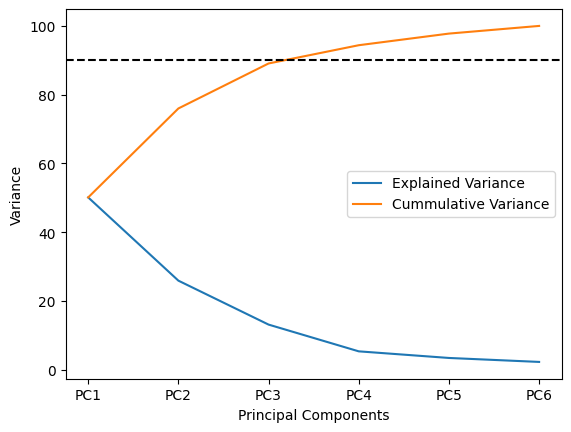

In [156]:
x = [f'PC{i+1}' for i in range(len(explained_variance))]
plt.plot(x, explained_variance, label='Explained Variance')
plt.plot(x, cummulative_variance, label='Cummulative Variance')
plt.axhline(y=90, color='black', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.legend()
plt.show()

## PLotting the pairplots for the orignal features

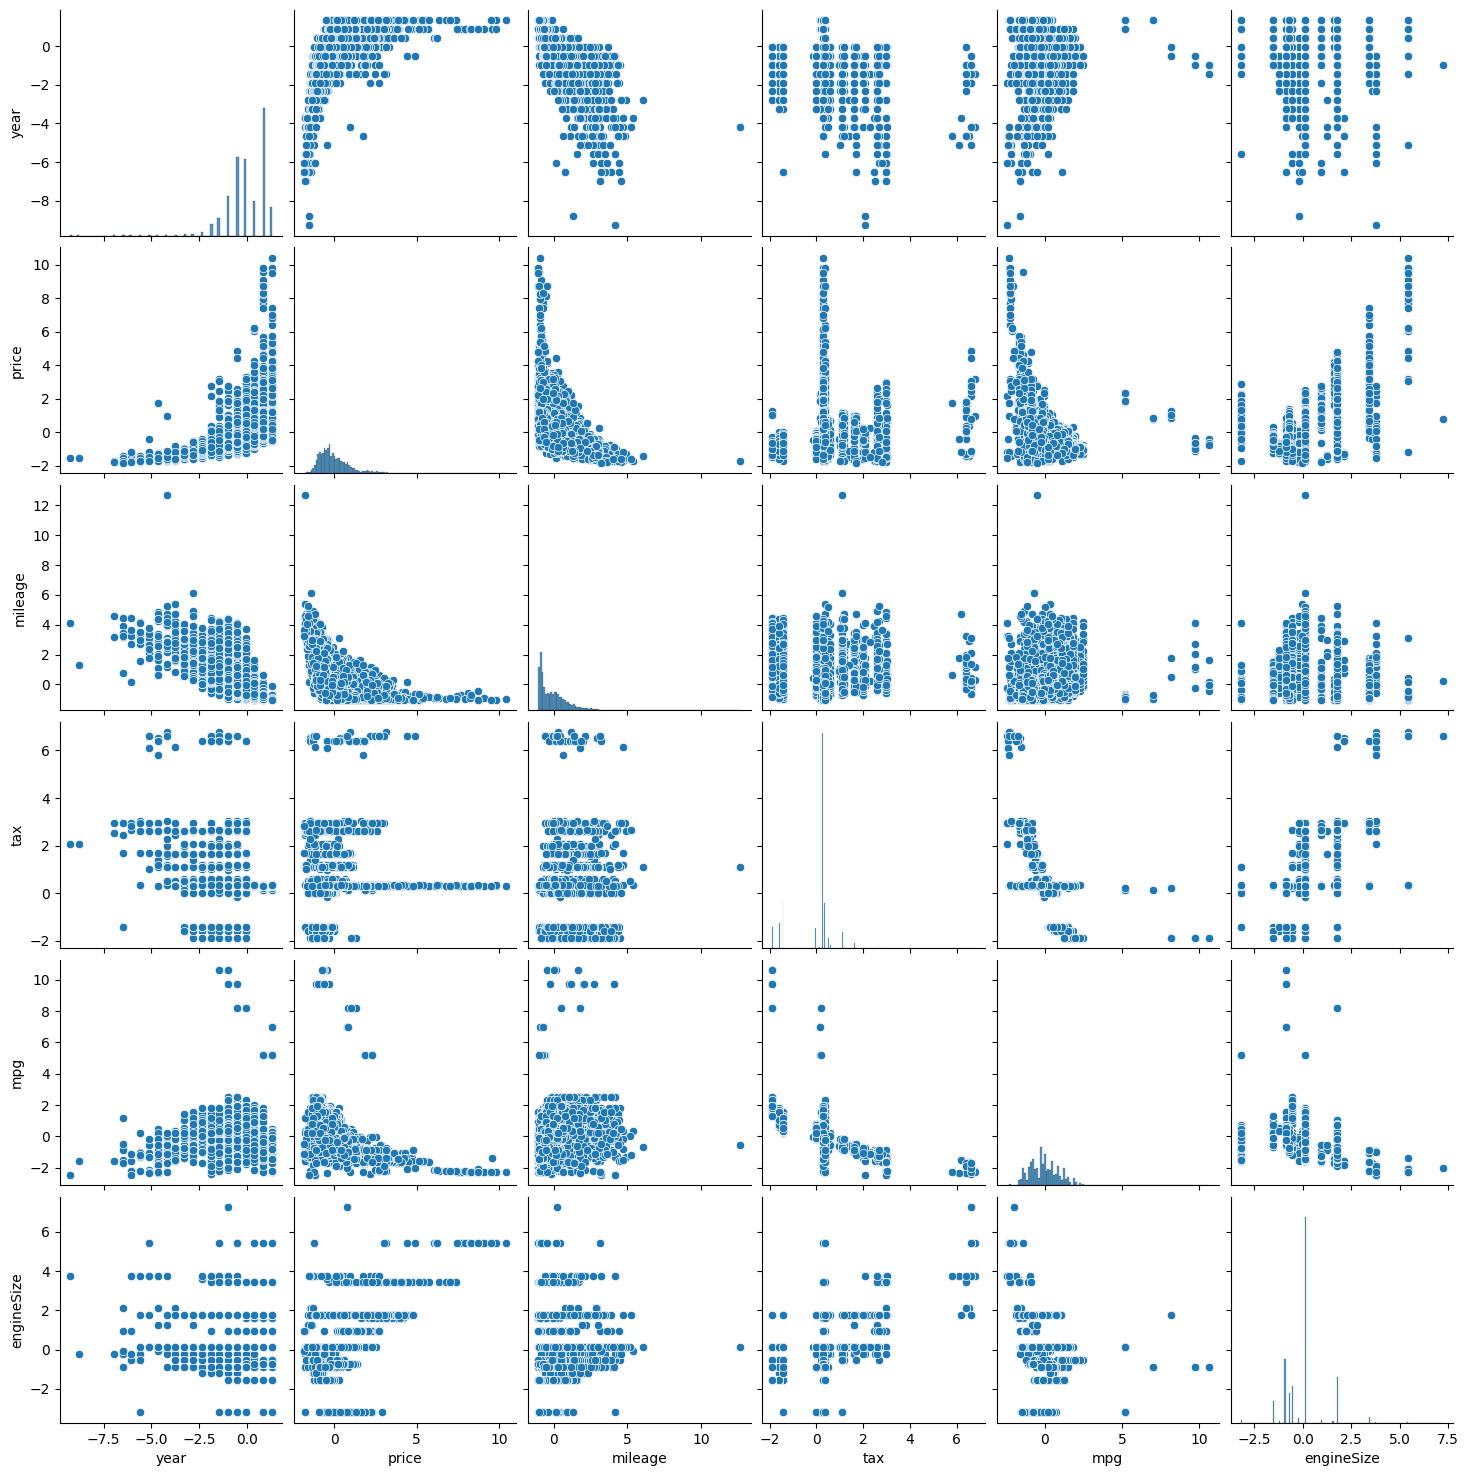

In [155]:
sns.pairplot(centered_data)

## Plotting the selected Principal Components onto these Pairplots

In [153]:
k = 3
color_list = ['red', 'violet', 'black']

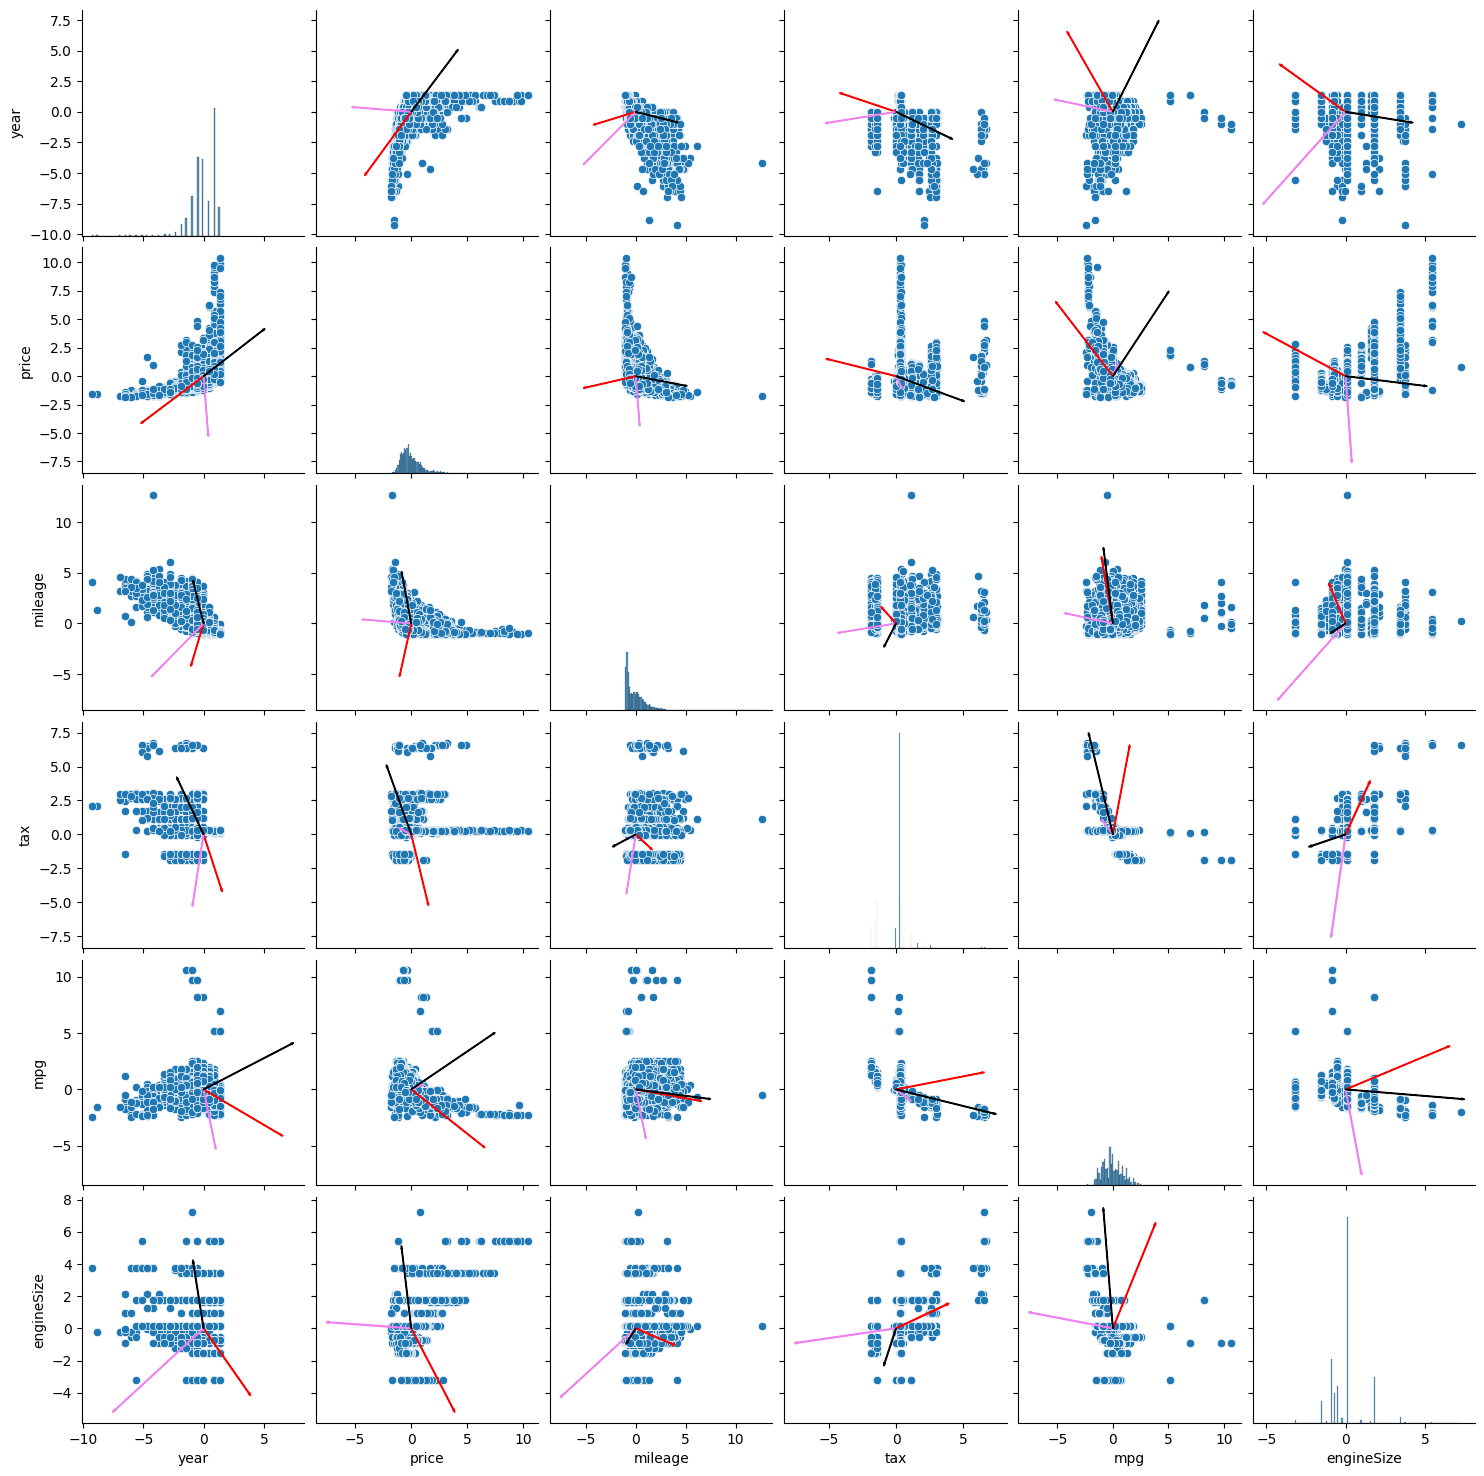

In [158]:
g = sns.pairplot(centered_data)
for i in range(6):
    for j in range(6):
        if (i != j):
            for pca_num in range(k):
                g.axes[i, j].arrow(0, 0, sorted_eigvecs[i, pca_num]*10, sorted_eigvecs[j, pca_num]*10, width=0.05, color = color_list[pca_num])    
plt.show()